# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress as st
import scipy.stats as st
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities n|ames
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | laurel
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | batamshinskiy
Processing Record 5 of Set 1 | bataraza
City not found. Skipping...
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | cheuskiny
City not found. Skipping...
Processing Record 10 of Set 1 | ramjibanpur
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | loubomo
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | vestmannaeyjar
Processing Record 22 of Set 

In [4]:
print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -19.3911,
        "lon": -40.0722
    },
    "dt": 1670272939,
    "id": 3458498,
    "main": {
        "feels_like": 23.09,
        "grnd_level": 1011,
        "humidity": 87,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 22.51,
        "temp_max": 22.51,
        "temp_min": 22.51
    },
    "name": "Linhares",
    "sys": {
        "country": "BR",
        "sunrise": 1670226833,
        "sunset": 1670274494
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 64,
        "gust": 6.37,
        "speed": 2.41
    }
}


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,22.16,86,67,2.01,BR,1670272948
1,laurel,39.0993,-76.8483,10.42,48,0,5.14,US,1670272948
2,faanui,-16.4833,-151.7500,26.45,77,68,7.45,PF,1670272949
3,batamshinskiy,50.5594,58.2747,-15.39,97,99,4.59,KZ,1670272949
4,hermanus,-34.4187,19.2345,13.78,66,98,1.43,ZA,1670272772


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,22.16,86,67,2.01,BR,1670272948
1,laurel,39.0993,-76.8483,10.42,48,0,5.14,US,1670272948
2,faanui,-16.4833,-151.7500,26.45,77,68,7.45,PF,1670272949
3,batamshinskiy,50.5594,58.2747,-15.39,97,99,4.59,KZ,1670272949
4,hermanus,-34.4187,19.2345,13.78,66,98,1.43,ZA,1670272772


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

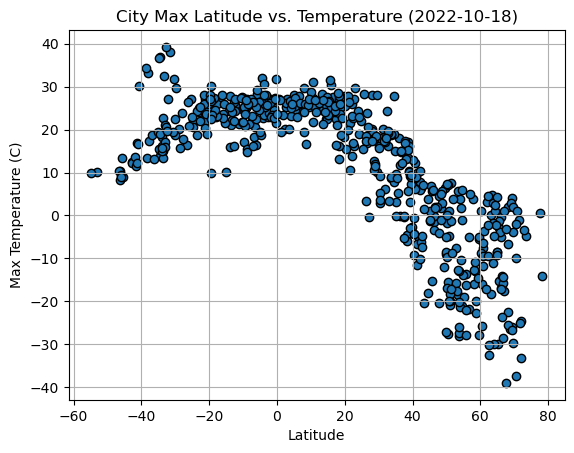

In [13]:
# Build scatter plot for latitude vs. temperature

#Define Axis
x = city_data_df['Lat']
y = city_data_df['Max Temp']

#Create Scatterplot
plt.scatter(x, y, edgecolors='black')


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("..\output_data\Fig1.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Humidity

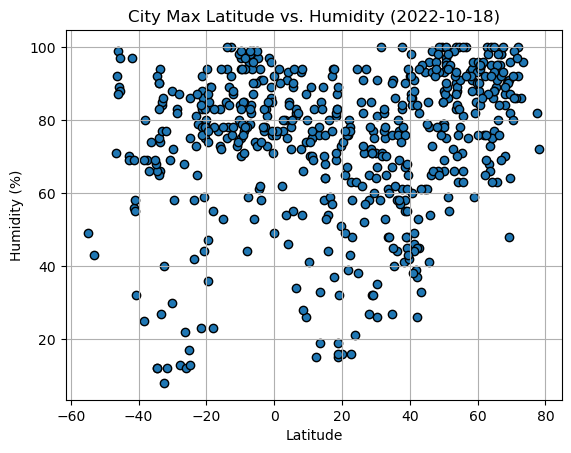

In [14]:
# Build the scatter plots for latitude vs. humidity

#Define Axis
x = city_data_df['Lat']
y = city_data_df['Humidity']

#Create Scatterplot
plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("..\output_data\Fig2.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

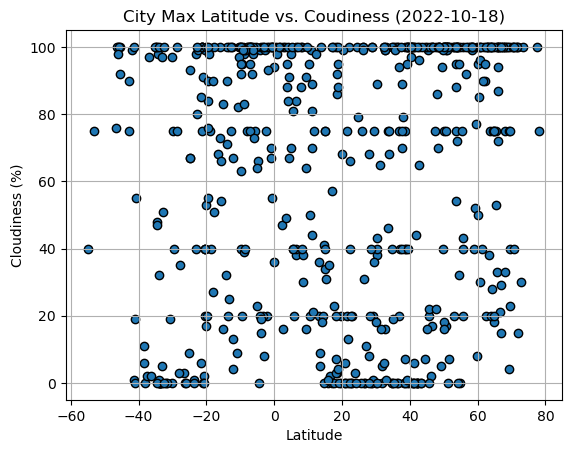

In [15]:
# Build the scatter plots for latitude vs. cloudiness

#Define Axis
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

#Create Scatterplot
plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Coudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("..\output_data\Fig3.png")

# Show plot
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

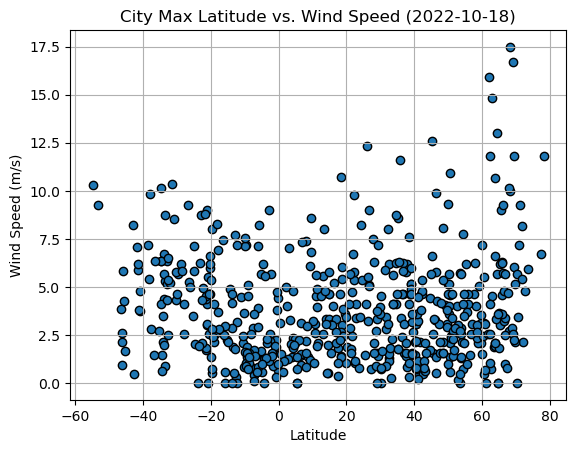

In [16]:
# Build the scatter plots for latitude vs. wind speed

#Define Axis
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

#Create Scatterplot
plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("..\output_data\Fig4.png")

# Show plot
plt.grid()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord):
  # Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
  slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
  regress_value = x_axis * slope + int
  line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

  #plt.clf()  #clear Pyplot figure

  # Plot scatter plot
  plt.scatter(x_axis,y_axis, color="blue")

  # Plot regression line
  plt.plot(x_axis,regress_value,"r-")
  plt.annotate(line_eq,(xcord,ycord),fontsize=15,color="red")

  # Label plot
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  # Print r square value
  print(f"R squared: {r**2}")

  # Show the graph that we have created
  plt.show()


In [18]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,22.16,86,67,2.01,BR,1670272948
1,laurel,39.0993,-76.8483,10.42,48,0,5.14,US,1670272948
2,faanui,-16.4833,-151.7500,26.45,77,68,7.45,PF,1670272949
3,batamshinskiy,50.5594,58.2747,-15.39,97,99,4.59,KZ,1670272949
4,hermanus,-34.4187,19.2345,13.78,66,98,1.43,ZA,1670272772


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,laurel,39.0993,-76.8483,10.42,48,0,5.14,US,1670272948
3,batamshinskiy,50.5594,58.2747,-15.39,97,99,4.59,KZ,1670272949
6,hilo,19.7297,-155.0900,27.93,73,20,3.58,US,1670272677
7,ramjibanpur,22.8333,87.6167,16.15,48,0,3.39,IN,1670272950
9,bilibino,68.0546,166.4372,-22.41,70,100,2.71,RU,1670272924


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,22.16,86,67,2.01,BR,1670272948
2,faanui,-16.4833,-151.7500,26.45,77,68,7.45,PF,1670272949
4,hermanus,-34.4187,19.2345,13.78,66,98,1.43,ZA,1670272772
5,chuy,-33.6971,-53.4616,22.72,66,0,4.36,UY,1670272949
8,punta arenas,-53.1500,-70.9167,10.06,43,75,9.26,CL,1670272813


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7063455158500059


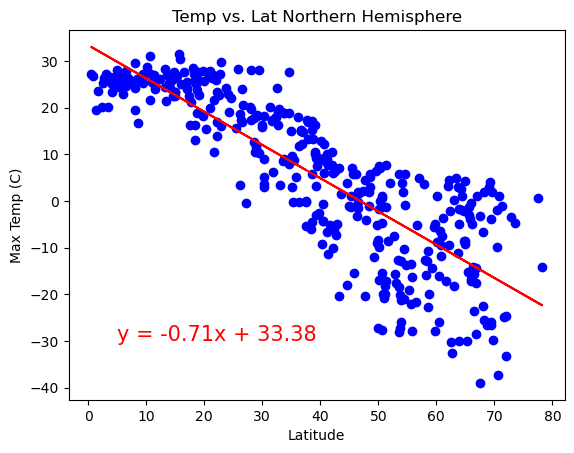

In [21]:
# Linear regression on Nothern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
title = "Temp vs. Lat Northern Hemisphere"
x_label = "Latitude"
y_label = "Max Temp (C)"
#equation label position
xcord = 5
ycord = -30

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

R squared: 0.201580555683927


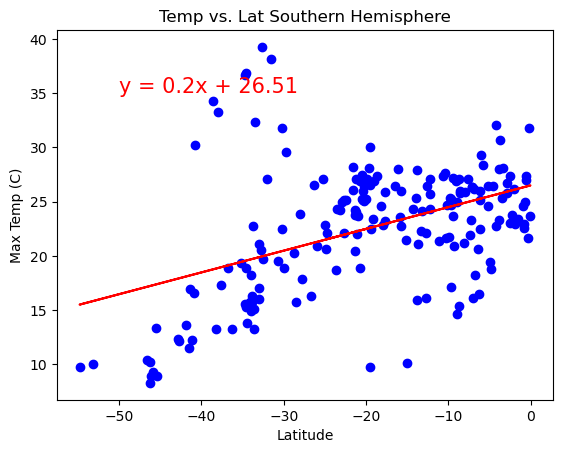

In [22]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
title = "Temp vs. Lat Southern Hemisphere"
x_label = "Latitude"
y_label = "Max Temp (C)"
#equation label position
xcord = -50
ycord = 35

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

**Discussion about the linear relationship:** In the northern hemisphere data, we see strong correlation between temperature and latitude inidcated by negative linear regression slope.  Essentially as we move away from the equator the temperature gets much cooler. The R-squared value of .71 indicates a solid fit of data.  In the southern hemisphere R squared is much lower at .20 so the fit is not as tight, but the graph indicates as you move from a very southern latitude and toward the equator the temperature does rise (postive linear regression slope.)  

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.12371363813239503


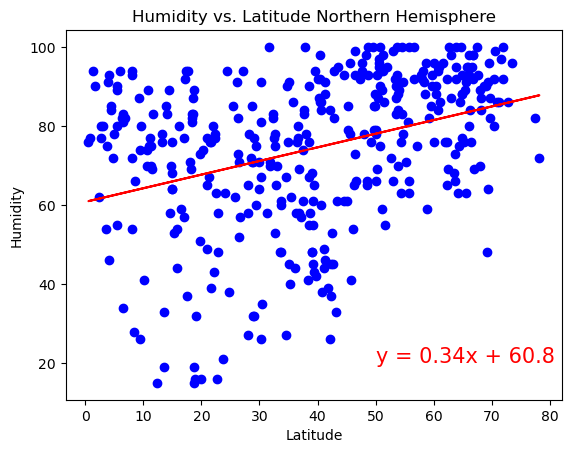

In [23]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
title = "Humidity vs. Latitude Northern Hemisphere"
x_label = "Latitude"
y_label = "Humidity"
#equation label position
xcord = 50
ycord = 20

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

R squared: 0.09684202142493235


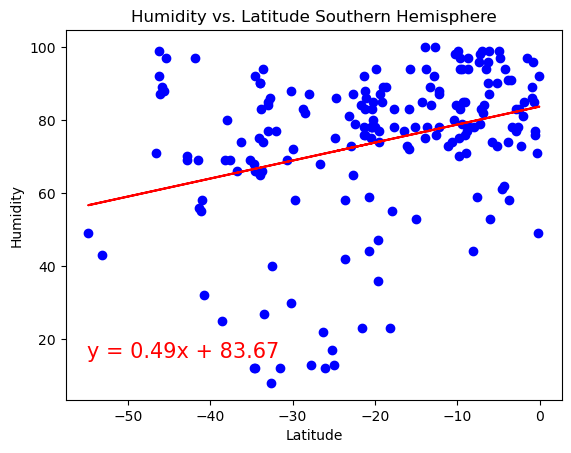

In [24]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
title = "Humidity vs. Latitude Southern Hemisphere"
x_label = "Latitude"
y_label = "Humidity"
#equation label position
xcord = -55
ycord = 15

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

**Discussion about the linear relationship:** In the northern hemisphere data, we see sugesstion correlation between humidity and latitude by the regression line and with a strong grouping of humid cities in the upper right quadrant.  However, with an R-Squared value of .12 the data is not a great fit.  In the southern hemisphere R squared is a bit higher, suggestiona  better fit, and the graph indicates as you move from a very southern latitude and toward the equator the humidity does rise.  

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.043952703477665285


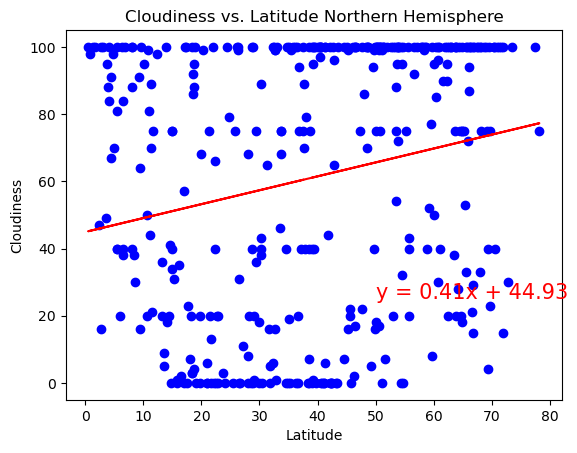

In [25]:
# Cloudiness vs. Latitude Linear Regression Plot Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
title = "Cloudiness vs. Latitude Northern Hemisphere"
x_label = "Latitude"
y_label = "Cloudiness"
#equation label position
xcord = 50
ycord = 25

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

R squared: 0.06239534150845735


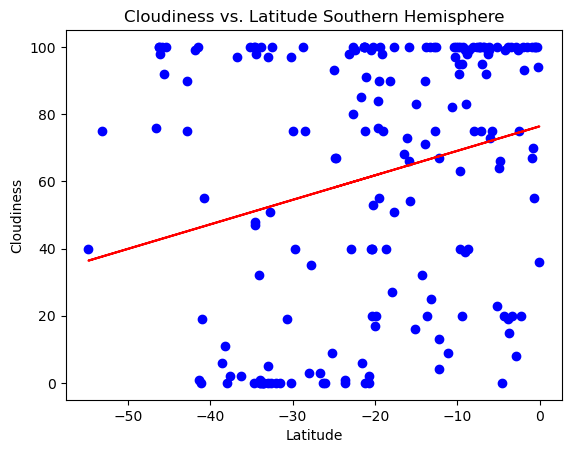

In [26]:
# Cloudiness vs. Latitude Linear Regression Plot Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
title = "Cloudiness vs. Latitude Southern Hemisphere"
x_label = "Latitude"
y_label = "Cloudiness"
#equation label position
xcord = 55
ycord = 50

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

**Discussion about the linear relationship:** Cloudiness vs. Latitude plot for cities in the northern and southeren hemisphere is shown above. The wind speed appears shows a positive linear relationship with latitudes in the northern hemisphere, with an r-value of .04 for the fit.  The cloudiness appears shows a  positive linear relationship with latitudes in the southern hemisphere, with an r-value of .06 for the fit.  The fit is highly divergent with many cities having a lot of cloudiness or not much at all, which explains the poor fit. 

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.03873658878445536


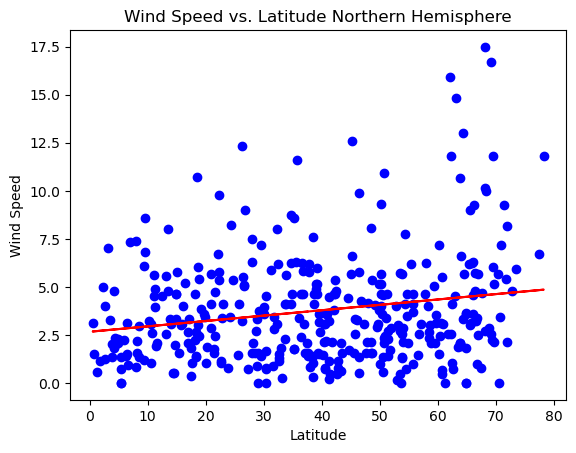

In [29]:
# Wind Speed  vs. Latitude Linear Regression Plot Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
title = "Wind Speed vs. Latitude Northern Hemisphere"
x_label = "Latitude"
y_label = "Wind Speed"
#equation label position
xcord = -55
ycord = 12

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

R squared: 0.1435653274365354


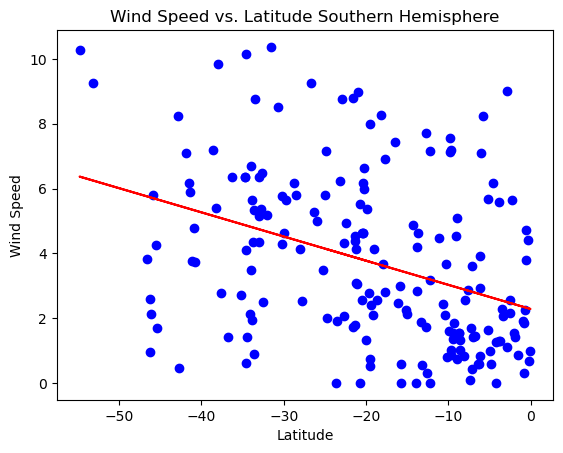

In [28]:
# Wind Speed  vs. Latitude Linear Regression Plot Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
title = "Wind Speed vs. Latitude Southern Hemisphere"
x_label = "Latitude"
y_label = "Wind Speed"
#equation label position
xcord = -55
ycord = 12

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

**Discussion about the linear relationship:** Wind Speed vs. Latitude plot for cities in the northern and southeren hemisphere is shown above. The wind speed appears shows a slight positive linear relationship with latitudes in the northern hemisphere, with an r-value of .39 for the fit.  The wind speed appears shows a strong negative linear relationship with latitudes in the southern hemisphere, with an r-value of .14 for the fit.  